# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Vineet Kumar S 416807
    
    2. Ningyuan Chen 350169
    
    3. Julia Reim 354921

## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#toDO whicht dataset should we use??

#read original csv
originalData = pd.read_csv('dataset.csv')
#sample 95% of original data with seed and rename sampled data
sampled_data = originalData.sample(frac = .95, random_state=354921)

## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [70]:
#Unique cancellation reasons in whole dataset
print(sampled_data['CANCELLATION_REASON'].unique())

#Create subsets where the flights have either been cancelled or not cancelled
sampled_data_cancelled = sampled_data[sampled_data['CANCELLED'] == 1]
sampled_data_not_cancelled = sampled_data[sampled_data['CANCELLED'] == 0]

#Unique cancellation reasons in subsets
print(sampled_data_cancelled['CANCELLATION_REASON'].unique())
print(sampled_data_not_cancelled['CANCELLATION_REASON'].unique())


['N' 'C' 'B' 'A' 'D']
['C' 'B' 'A' 'D']
['N']


    Your answer: 
    The unique values of cancellation reasons are: "A, B, C, D and N"
    The unique values of cancellation in flights that have been cancelled are: "A, B, C and D"
    The unique values of cancellation in flights that have not been cancelled are: "N"
    

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [21]:
#Drop rows with at least one null value
no_null_data = sampled_data.dropna()

#Unique cancellation reasons in filtered dataset withoun null values
print(no_null_data['CANCELLATION_REASON'].unique())

['N']


    Your answer:
    The only cancellation reason in the "no_null_data" dataset is "N"
    Can you explain the difference? It is not clear why rows with null values have only an "N" as cancellation reason. A poosibility would be that the system sets "N" per default and is overwritten when the flight is cancelled. However, if there is no data for a flight, the "N" value is not overriden. "N" probably stands for "Not cancelled" or "None"
    

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

Text(0.5, 1.0, 'Air system delay cleaned outliers?')

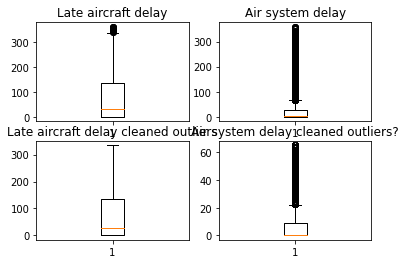

In [195]:
#Filter data with Airline EV
ev_data = no_null_data[no_null_data['AIRLINE'] == 'EV']
#Filter data with more than 2 hours delay
ev_data = ev_data[ev_data['ARRIVAL_DELAY'] >= 120]
#Filter data with less than 6 hours delay
ev_data = ev_data[ev_data['ARRIVAL_DELAY'] <= 360]


fig, axs = plt.subplots(2, 2)
axs[0,0].boxplot(ev_data['LATE_AIRCRAFT_DELAY'])
axs[0,0].set_title('Late aircraft delay')

axs[0,1].boxplot(ev_data['AIR_SYSTEM_DELAY'])
axs[0,1].set_title('Air system delay')

Q1LAD = ev_data['LATE_AIRCRAFT_DELAY'].quantile(0.25)
Q3LAD = ev_data['LATE_AIRCRAFT_DELAY'].quantile(0.75)

IQRLAD = Q3LAD-Q1LAD

filter = (ev_data['LATE_AIRCRAFT_DELAY'] >= Q1LAD - IQRLAD * 1.5) & (ev_data['LATE_AIRCRAFT_DELAY'] <= Q3LAD + IQRLAD * 1.5)
cleaned_data_late_aircraft = ev_data.loc[filter]

axs[1,0].boxplot(cleaned_data_late_aircraft['LATE_AIRCRAFT_DELAY'])
axs[1,0].set_title('Late aircraft delay cleaned outliers')


Q1ASD = ev_data['AIR_SYSTEM_DELAY'].quantile(0.25)
Q3ASD = ev_data['AIR_SYSTEM_DELAY'].quantile(0.75)

IQRASD = Q3ASD-Q1ASD



filter = (ev_data['AIR_SYSTEM_DELAY'] >= Q1ASD - IQRASD * 1.5) & (ev_data['AIR_SYSTEM_DELAY'] <= Q3ASD + IQRASD * 1.5)
cleaned_data_air_system = ev_data.loc[filter]

axs[1,1].boxplot(cleaned_data_air_system['AIR_SYSTEM_DELAY'])
axs[1,1].set_title('Air system delay cleaned outliers?')





#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [196]:
import statistics

ev_data_median = np.median(ev_data['ARRIVAL_DELAY'])
ev_data_mean = np.mean(ev_data['ARRIVAL_DELAY'])
ev_data_mode = statistics.mode(ev_data['ARRIVAL_DELAY'])
ev_data_std = np.std(ev_data['ARRIVAL_DELAY'])
ev_data_var = np.var(ev_data['ARRIVAL_DELAY'])


cleaned_data_late_aircraft_median = np.median(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
cleaned_data_late_aircraft_mean = np.mean(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
cleaned_data_late_aircraft_mode = statistics.mode(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
cleaned_data_late_aircraft_sd = np.std(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
cleaned_data_late_aircraft_var = np.var(cleaned_data_late_aircraft['ARRIVAL_DELAY'])


cleaned_data_air_system_median = np.median(cleaned_data_air_system['ARRIVAL_DELAY'])
cleaned_data_air_system_mean = np.mean(cleaned_data_air_system['ARRIVAL_DELAY'])
cleaned_data_air_system_mode = statistics.mode(cleaned_data_air_system['ARRIVAL_DELAY'])
cleaned_data_air_system_sd = np.std(cleaned_data_air_system['ARRIVAL_DELAY'])
cleaned_data_air_system_var = np.var(cleaned_data_air_system['ARRIVAL_DELAY'])




print('ev_data:')
print('\t' ,  'Median' , ev_data_median)
print('\t' ,  'Mean' , ev_data_mean)
print('\t' ,  'Mode', ev_data_mode)
print('\t' ,  'Standard deviation' , ev_data_std)
print('\t' ,  'Variance' , ev_data_var)

print('cleaned_data_late_aircraft')
print('\t' ,  'Median' , cleaned_data_late_aircraft_median)
print('\t' ,  'Mean' , cleaned_data_late_aircraft_mean)
print('\t' ,  'Mode', cleaned_data_late_aircraft_mode)
print('\t' ,  'Standard deviation' , cleaned_data_late_aircraft_sd)
print('\t' ,  'Variance' , cleaned_data_late_aircraft_var)

print('cleaned_data_air_system')
print('\t' ,  'Median air_system' , cleaned_data_air_system_median)
print('\t' ,  'Mean air_system' , cleaned_data_air_system_mean)
print('\t' ,  'Mode air_system', cleaned_data_air_system_mode)
print('\t' ,  'Standard deviation air_system' , cleaned_data_air_system_sd)
print('\t' ,  'Variance air_system' , cleaned_data_air_system_var)




ev_data:
	 Median 165.0
	 Mean 181.79647825663974
	 Mode 121.0
	 Standard deviation 55.21126255785239
	 Variance 3048.2835132321134
cleaned_data_late_aircraft
	 Median 165.0
	 Mean 181.46778438444292
	 Mode 121.0
	 Standard deviation 54.75960285607956
	 Variance 2998.6141049555567
cleaned_data_air_system
	 Median air_system 164.0
	 Mean air_system 181.30694800652833
	 Mode air_system 123.0
	 Standard deviation air_system 55.226440752658526
	 Variance air_system 3049.9597582069027


    Your answer: 
    Allthough the results look pretty similar between the dataset, plotting the data might still result in plots that vary greatly.
    
|                    | ev_data | cleaned_data_late_aircraft | cleaned_data_air_system |
|--------------------|---------|----------------------------|-------------------------|
| Median             | 166     | 166                        | 162                     |
| Mean               | 181,13  | 180,98                     | 177,65                  |
| Mode               | 130,0   | 130,0                      | 138,0                   |
| Standard deviation | 58,12   | 57,92                      | 56,49                   |
| Variance           | 3377,78 | 3355,14                    | 3191,03                 |    


    You can see that for ev_data and cleaned_data_late aircraft the numbers look almost similar. Cleaned_data_air_system has a smaller mean and median but a larger mode and a smaller variance. The smaller variance could explain why the mode is higher
    
    
    toDo mode explanation todo update the table
        

    

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

<AxesSubplot:xlabel='MONTH', ylabel='ARRIVAL_DELAY'>

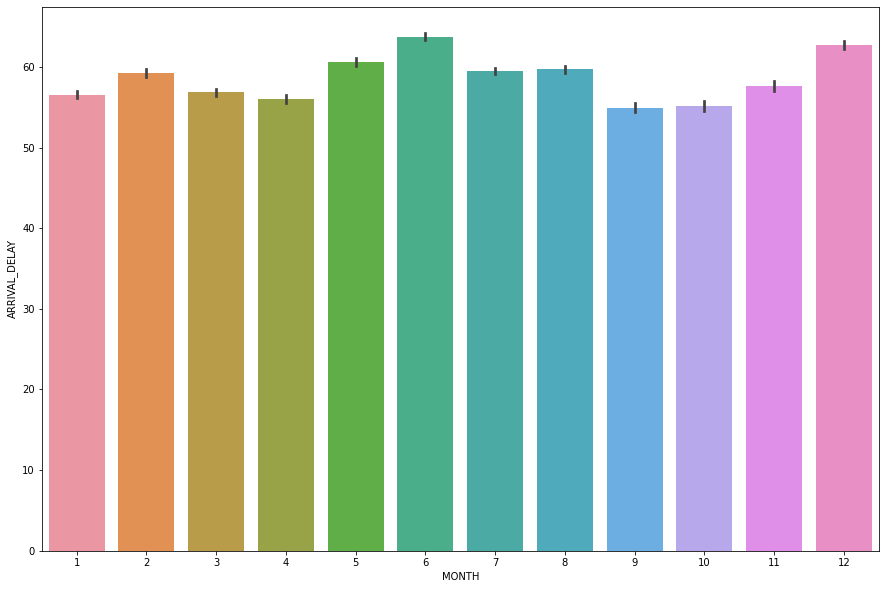

In [90]:
import seaborn as sns


plt.figure(figsize=(15,10))
sns.barplot(x='MONTH', y='ARRIVAL_DELAY', data=no_null_data)

    Your answer: The months September and October would be the safest to book if you want minimal delay. The months June and December would be the worst. 


#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

<AxesSubplot:xlabel='MONTH', ylabel='WEATHER_DELAY'>

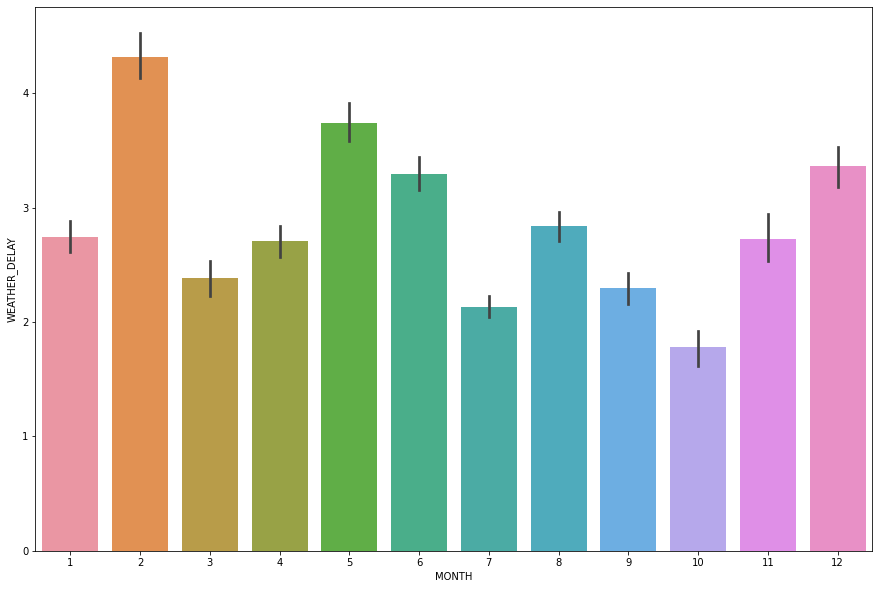

In [91]:
import seaborn as sns


plt.figure(figsize=(15,10))
sns.barplot(x='MONTH', y='WEATHER_DELAY', data=no_null_data)


    Your answer: The month October has the smallest average weather delay whereas the month February has the biggest weather delay.


#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

    Your answer: Weather delay is only a subgroup of delay reasons in total. The biggest total delays are in May and December. May also has a big amount of weather delays whereas december does not have such a huge amount. Therefore one can assume that in May the weather is responsible for a lot of delays, whereas in December the weather is only responsible for some delays and most delays could probably occur because of the christmas holidays. Also the axes of the weather delay is much smaller, because a lot of values are 0.
    

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

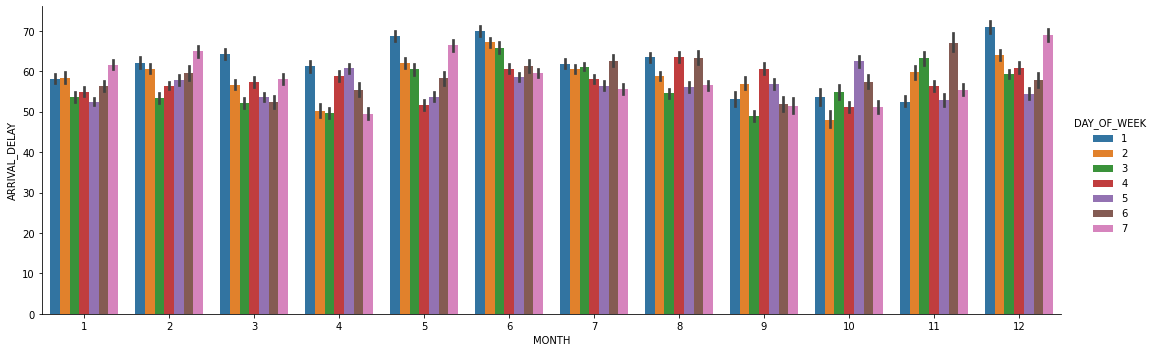

In [99]:

sns.catplot(
    x = 'MONTH', y = 'ARRIVAL_DELAY', hue='DAY_OF_WEEK', data = no_null_data, kind='bar', aspect = 3)



    Your answer: Mondays and Sundays in December, Mondays in May and June as well as Saturdays in November should be avoided


#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

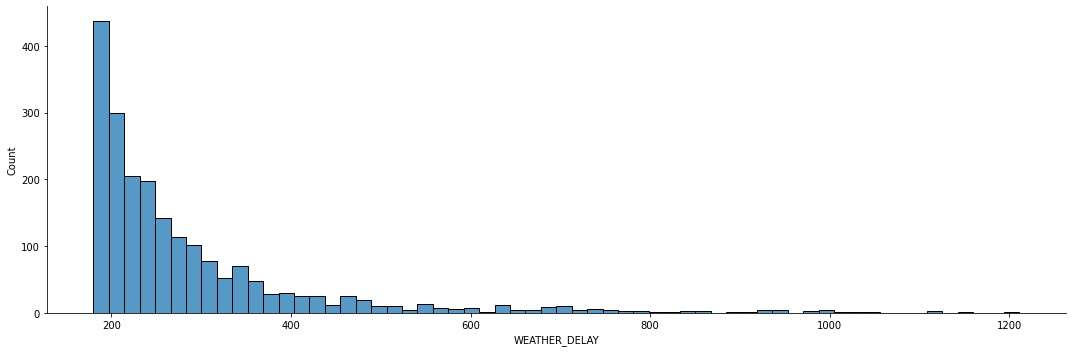

In [106]:
weather_delay_from3 = no_null_data[no_null_data['WEATHER_DELAY'] >= 180]


sns.displot(data=weather_delay_from3, x='WEATHER_DELAY', aspect=3)


#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

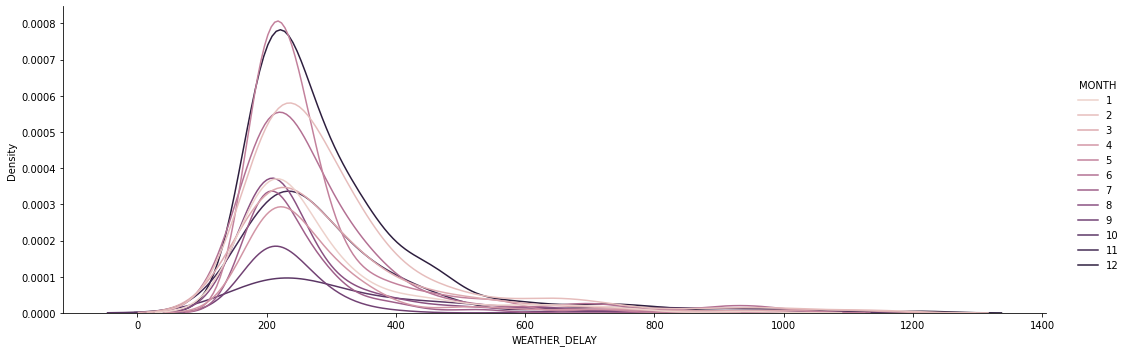

In [279]:
sns.displot(data=weather_delay_from3, x='WEATHER_DELAY', hue = 'MONTH', aspect=3, kind = 'kde')
#toDo colors and what does density mean?

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

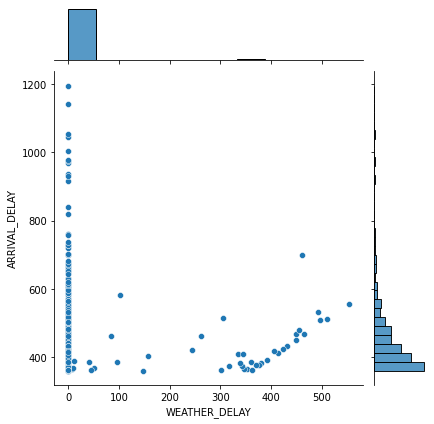

In [283]:
ev_vx_data = no_null_data[(no_null_data['AIRLINE'] == 'EV') | (no_null_data['AIRLINE'] == 'VX')]
#Filter data with more than 2 hours delay
ev_vx_data_over6 = ev_vx_data[ev_vx_data['ARRIVAL_DELAY'] >= 360]


sns.jointplot(data = ev_vx_data_over6, x= 'WEATHER_DELAY',  y= 'ARRIVAL_DELAY', kind = 'scatter')

       Your answer: Only with a weather delay of more then 300 minutes the arrival delay seems to be slowly rising till about 600 minutes. With a weather delay of close to zero there are most arrival delays up to 1200 minutes. Thus we can assume that the weather delay does not necessarily influence the arrival delay, and if it does, then just up to 600-800 minutes. 


## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [166]:
no_null_data_ua = no_null_data[no_null_data['AIRLINE'] == 'UA']
no_null_data_ua = no_null_data_ua[no_null_data_ua['ARRIVAL_DELAY'] >= 0]


delay = []
for arrivalDelay in no_null_data_ua['ARRIVAL_DELAY']:
    if arrivalDelay <= 45:
        delay.append('acceptable_delay')
    else:
        delay.append('unacceptable_delay')

        
no_null_data_ua = no_null_data_ua.assign(DELAY= delay)


max_distance = no_null_data_ua['DISTANCE'].max()
min_distance = no_null_data_ua['DISTANCE'].min()


size_distance = max_distance - min_distance

half_size_distance = size_distance/2

half_distance_border = min_distance + half_size_distance


distance_category = []
for distance in no_null_data_ua['DISTANCE']:
    if distance <= half_distance_border:
        distance_category.append('short')
    else:
        distance_category.append('long')


no_null_data_ua = no_null_data_ua.assign(DISTANCE_CATEGORY = distance_category)    

#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

In [223]:
import pip
#pip.main(['install', 'p_decision_tree'])
from p_decision_tree.DecisionTree import DecisionTree



descriptive_features = ['SCHEDULED_DEPARTURE_CATEGORY','DISTANCE_CATEGORY','DAY_OF_WEEK']
target_feature = 'DELAY'

columns = no_null_data_ua.columns



for column in columns:
        no_null_data_ua[column] = no_null_data_ua[column].astype(str)
        
no_null_data_ua_descriptive = no_null_data_ua[descriptive_features].values
no_null_data_ua_target = no_null_data_ua[target_feature].values.tolist()


decisionTree = DecisionTree(no_null_data_ua_descriptive.tolist(), descriptive_features, no_null_data_ua_target, "entropy" )
decisionTree.id3(0, 1000)

dot = decisionTree.print_visualTree(render = True)


#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer: The best feature for splitting the tree in the second round is the feature "DAY_OF_WEEK"
    

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer: Short distance flight on Monday and Tuesday evening are more prone to a longer delay. Long distance flights on Wednesday and Thursday afternoon, short distance flights on Monday afternoon and flights on Tuesday afternoon in general seem to cause longer delay. So two possible rules could be: 1. Don't fly Monday or Tuesday evening, 2. Don't fly in the afternoon from Monday to Thursday. 


## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [224]:
flights_classifying = pd.read_csv('flights_classifying.csv')


Randomly order the data points using one of the group member's students as the random state.

In [226]:
sampled_flights = flights_classifying.sample(frac = 1, random_state=354921)


### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [287]:
target_df = sampled_flights[sampled_flights['CANCELLED'] == 0]


delay = []
for arrivalDelay in target_df['ARRIVAL_DELAY']:
    if arrivalDelay <= 180:
        delay.append(0)
    else:
        delay.append(1)

        
target_df = target_df.assign(DELAY= delay)


target_feature = target_df['DELAY']



#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [288]:
"""
The variables that are manipulable by me when I choose a flight are: Month, day, day of 
week, airline, origin airport, destination airport, day_yearly, week and scheduled departure
category. Day_yearly, week, and day are too scattered to create a good model. They might 
lead to far to precise solutions/overfitting that are not generalizable. Then there are only month, 
day of week, airline, origin airport, destination airport and scheduled departure category
left. From those "origin airport" does also not make a lot of sense, since I can not choose
the airport I am flying from. We would also not like to include "destination airport",
because we want to have some freedom as to where we will fly to. 
This leads to our descriptive features: Month, day of week, airline and scheduled departure
category
"""

descriptive_features = target_df[['MONTH','DAY_OF_WEEK','AIRLINE', 'SCHEDULED_DEPARTURE_CATEGORY']]
descriptive_features = pd.get_dummies(descriptive_features, columns = ['AIRLINE', 'SCHEDULED_DEPARTURE_CATEGORY'])

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [290]:
from sklearn.model_selection import train_test_split
train_descriptive, test_descriptive, train_target, test_target = train_test_split(descriptive_features, target_feature, test_size=0.85, random_state=354921, stratify=target_feature)


#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [ ]:
#you may put code here, if necessary

    Your answer: Confusion Matrix -> Accuracy, Precision, Recall, F1 Measure
    k-fold cross validation
    Average class accuracy
    
    
    

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [ ]:
# Your code
??

    Your answer:
    
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [302]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

#from sklearn.metrics import mean_squared_error, mean_absolute_error


classifier = LinearRegression()

model = classifier.fit(train_descriptive, train_target)
target_feature_predict = classifier.predict(test_descriptive)

#print('Coefficients: \n', classifier.coef_)
#print('Intercept: \n', classifier.intercept_)
#print("Mean squared error: %.2f" % mean_squared_error(target_feature, target_feature_predict))


from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept': [True, False],
              'n_jobs' : [1, -1, 2, -2]
             }
grid = GridSearchCV(LinearRegression(), param_grid, cv = 7, verbose = 3) 
grid.fit(train_descriptive, train_target)
print(grid.best_params_) 

Fitting 7 folds for each of 8 candidates, totalling 56 fits
[CV 1/7] END ......fit_intercept=True, n_jobs=1;, score=0.005 total time=   0.2s
[CV 2/7] END ......fit_intercept=True, n_jobs=1;, score=0.007 total time=   0.2s
[CV 3/7] END ......fit_intercept=True, n_jobs=1;, score=0.006 total time=   0.2s
[CV 4/7] END ......fit_intercept=True, n_jobs=1;, score=0.006 total time=   0.2s
[CV 5/7] END ......fit_intercept=True, n_jobs=1;, score=0.007 total time=   0.2s
[CV 6/7] END ......fit_intercept=True, n_jobs=1;, score=0.008 total time=   0.2s
[CV 7/7] END ......fit_intercept=True, n_jobs=1;, score=0.005 total time=   0.2s
[CV 1/7] END .....fit_intercept=True, n_jobs=-1;, score=0.005 total time=   0.2s
[CV 2/7] END .....fit_intercept=True, n_jobs=-1;, score=0.007 total time=   0.2s
[CV 3/7] END .....fit_intercept=True, n_jobs=-1;, score=0.006 total time=   0.2s
[CV 4/7] END .....fit_intercept=True, n_jobs=-1;, score=0.006 total time=   0.2s
[CV 5/7] END .....fit_intercept=True, n_jobs=-1;,

#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [294]:
from sklearn.svm import SVC

classifier = SVC(C=1, kernel = 'linear', gamma = 'auto')
classifier.fit(train_descriptive, train_target)

target_feature_predict = classifier.predict(test_descriptive)
target_feature_predict[0:5]

print('Indicies of support vectors:')
print(classifier.support_)

print('The support vectors:')
print(classifier.support_vectors_)

print('The number of support vectors for each class:')
print(classifier.n_support_)

from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ['linear','poly','rbf','sigmoid']}  
grid = GridSearchCV(SVC(C=1), param_grid, cv = 5, verbose = 3) 
grid.fit(train_descriptive, train_target)
print(grid.best_params_) 


Indicies of support vectors:
[   54    60    62 ... 78765 78791 78795]
The support vectors:
[[ 1.  7.  1. ...  0.  0.  0.]
 [12.  1.  0. ...  1.  0.  0.]
 [12.  1.  0. ...  1.  0.  0.]
 ...
 [12.  4.  0. ...  0.  1.  0.]
 [ 4.  1.  0. ...  0.  0.  0.]
 [ 1.  1.  0. ...  0.  1.  0.]]
The number of support vectors for each class:
[5829 5673]
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................kernel=linear;, score=0.928 total time=  21.3s
[CV 2/5] END .....................kernel=linear;, score=0.928 total time=  21.4s
[CV 3/5] END .....................kernel=linear;, score=0.928 total time=  21.1s
[CV 4/5] END .....................kernel=linear;, score=0.928 total time=  21.6s
[CV 5/5] END .....................kernel=linear;, score=0.928 total time=  21.7s
[CV 1/5] END .......................kernel=poly;, score=0.928 total time= 1.1min
[CV 2/5] END .......................kernel=poly;, score=0.928 total time= 1.1min
[CV 3/5] END ..................

#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree

classifier = MLPClassifier(hidden_layer_sizes=(100,))
classifier.fit(descriptive_features, target_feature)

target_feature_predict = classifier.predict(test_descriptive)
target_feature_predict[0:5]

from sklearn.model_selection import GridSearchCV
param_grid = {'hidden_layer_sizes': [100, 200, 300],
             'activation': ['identity', 'logistic', 'tanh', 'relu'],
             'solver': ['lbfgs', 'sgd', 'adam'],
             'alpha' : [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]}
              
grid = GridSearchCV(MLPClassifier(), param_grid, cv = 5, verbose = 3) 
grid.fit(train_descriptive, train_target)
print(grid.best_params_) 


#Confusion Matrix
cm = confusion_matrix(test_target, target_feature_predict)
print(cm)

#Crosstab function

pred_target = np.array(target_feature_predict)
true_target = np.array(test_target)

pd.crosstab(true_target, pred_target, rownames=['True'], colnames=['Predicted'], margins = True)

from sklearn.metrics import classification_report

print(classification_report(true_target, pred_target))



Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=100, solver=lbfgs;, score=0.928 total time=   3.6s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=100, solver=lbfgs;, score=0.928 total time=   3.4s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=100, solver=lbfgs;, score=0.928 total time=   3.4s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=100, solver=lbfgs;, score=0.928 total time=   2.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=100, solver=lbfgs;, score=0.928 total time=   2.4s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=100, solver=sgd;, score=0.928 total time=   4.5s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=100, solver=sgd;, score=0.928 total time=   3.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=100, solver=sgd;, score=0.928 total time=   3.6

[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=200, solver=adam;, score=0.928 total time=   2.3s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=200, solver=adam;, score=0.928 total time=   3.8s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=200, solver=adam;, score=0.928 total time=   3.7s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=200, solver=adam;, score=0.928 total time=   3.9s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=200, solver=adam;, score=0.928 total time=   3.6s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=300, solver=lbfgs;, score=0.928 total time=  12.8s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=300, solver=lbfgs;, score=0.928 total time=  12.4s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=300, solver=lbfgs;, score=0.928 total time=  10.8s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=300

[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=100, solver=sgd;, score=0.928 total time=   6.8s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=100, solver=sgd;, score=0.928 total time=   3.4s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=100, solver=sgd;, score=0.928 total time=   4.6s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=100, solver=adam;, score=0.928 total time=   4.4s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=100, solver=adam;, score=0.928 total time=   6.7s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=100, solver=adam;, score=0.928 total time=   4.5s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=100, solver=adam;, score=0.928 total time=   4.4s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=100, solver=adam;, score=0.928 total time=   5.4s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=200, solver=lbfgs;, score=0

[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=300, solver=sgd;, score=0.928 total time=  26.3s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=300, solver=sgd;, score=0.928 total time=  26.8s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=300, solver=sgd;, score=0.928 total time=  28.8s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=300, solver=sgd;, score=0.928 total time=  29.4s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=300, solver=sgd;, score=0.928 total time=  27.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=300, solver=adam;, score=0.928 total time=   6.5s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=300, solver=adam;, score=0.928 total time=   8.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=300, solver=adam;, score=0.928 total time=   6.3s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=300, solver=adam;, score=0.928 total time=   6.

### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [ ]:
# your code if needed

    Your answer:
    
    

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [ ]:
# Your code


    Your answer:
    

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [ ]:
# Your code


    Your answer:
    

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

In [ ]:
# Your code


    Your answer:
    